In [25]:
# importing some required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [26]:
#reading the data
df = pd.read_csv('car_data.csv')

In [27]:
df.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.00000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591,19.184713,6.012739,232.073248,3215.191083,14.757962,72.146497,1.43949
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664,5.909382,1.815133,120.030803,967.364627,2.924589,1.462415,0.71913
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.00000
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707,14.000000,4.000000,113.000000,2300.000000,13.000000,71.000000,1.00000
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917,18.000000,6.000000,232.000000,3121.000000,14.500000,72.000000,1.00000
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878,24.000000,8.000000,350.000000,4129.000000,16.500000,73.000000,2.00000
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323,35.000000,8.000000,455.000000,5140.000000,23.500000,75.000000,3.00000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [29]:
df = df.rename({'__year_resale_value':'resale_value'},axis=1)

In [30]:
# dropping some unnecessary attributes for our prediction
df = df.drop(["Manufacturer","Model","Sales_in_thousands","Vehicle_type","Latest_Launch","Sales_in_thousands","mpg","cylinders","displacement","weight","acceleration","model year","origin","Wheelbase","Width","Length","Curb_weight","Fuel_efficiency"],axis=1)

Dealing with null values

In [31]:
df.isna().sum()

resale_value          36
Price_in_thousands     2
Engine_size            1
Horsepower             1
Fuel_capacity          1
Power_perf_factor      2
dtype: int64

In [32]:
#Now we will the null values with mean
df['resale_value'].fillna(value=df['resale_value'].mean(),inplace=True)
df["Price_in_thousands"].fillna(value=df["Price_in_thousands"].mean(),inplace=True)
df["Engine_size"].fillna(value=df["Engine_size"].mean(),inplace=True)
df["Horsepower"].fillna(value=df["Horsepower"].mean(),inplace=True)
df["Fuel_capacity"].fillna(value=df["Fuel_capacity"].mean(),inplace=True)
df["Power_perf_factor"].fillna(value=df["Power_perf_factor"].mean(),inplace=True)

In [33]:
df.isna().sum()

resale_value          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Fuel_capacity         0
Power_perf_factor     0
dtype: int64

Relationship analysis among attributes

In [34]:
#checking relation between attributes
df.corr()

,resale_value,Price_in_thousands,Engine_size,Horsepower,Fuel_capacity,Power_perf_factor
resale_value,1.000000,0.822395,0.468781,0.696888,0.275026,0.743783
Price_in_thousands,0.822395,1.000000,0.626839,0.838450,0.423230,0.897945
Engine_size,0.468781,0.626839,1.000000,0.837360,0.663022,0.818481
Horsepower,0.696888,0.838450,0.837360,1.000000,0.499907,0.991464
Fuel_capacity,0.275026,0.423230,0.663022,0.499907,1.000000,0.501123
Power_perf_factor,0.743783,0.897945,0.818481,0.991464,0.501123,1.000000


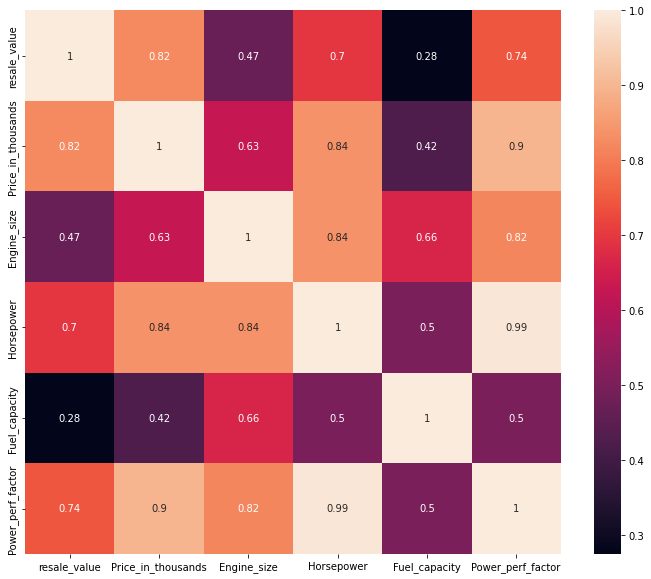

In [35]:
#let's visualize the correlation through heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

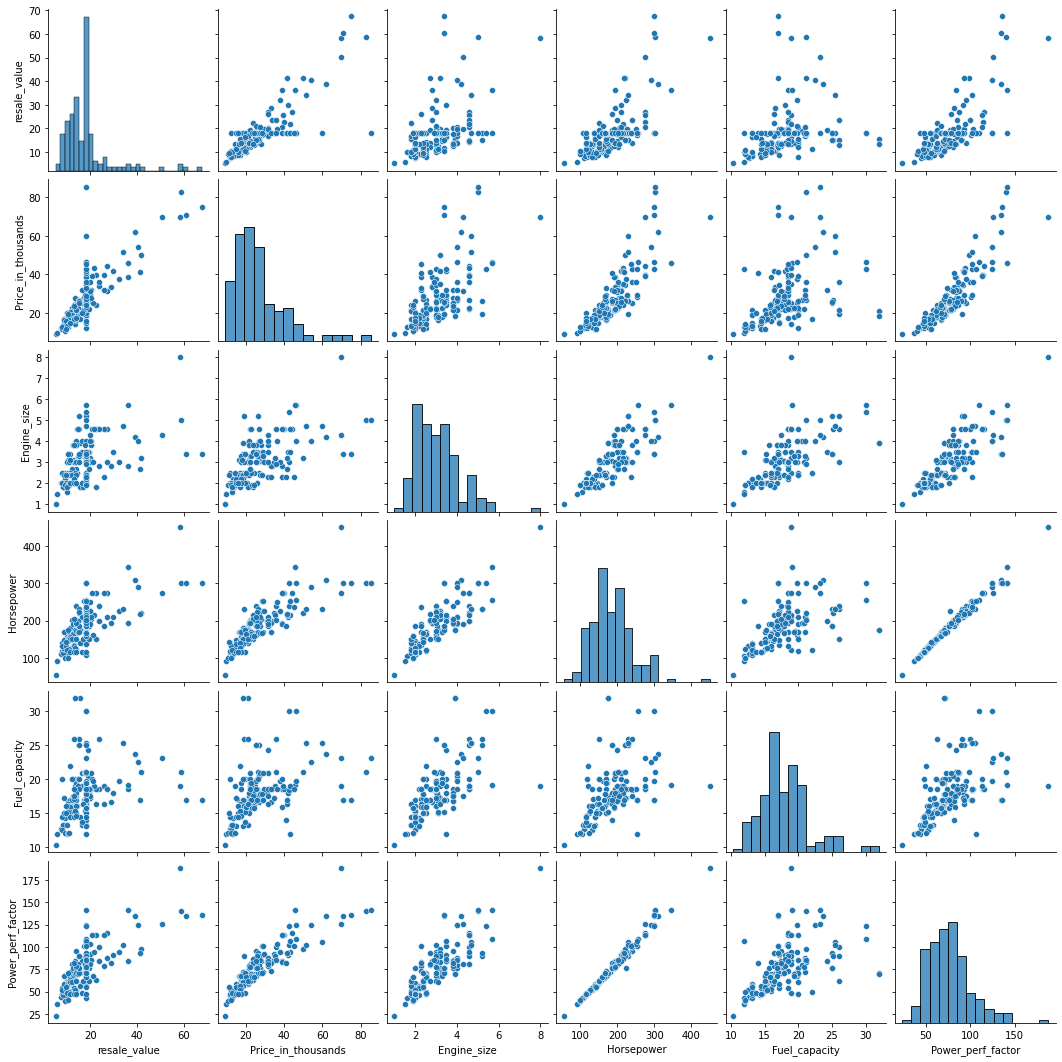

In [36]:
#let's visualize through pairplot
sns.pairplot(df)

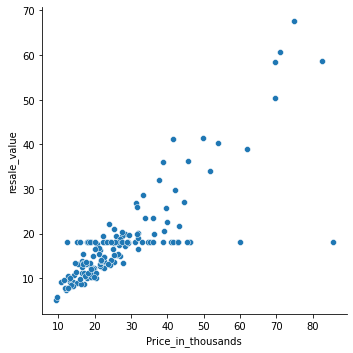

In [37]:
sns.relplot(x="Price_in_thousands",y="resale_value",data=df)

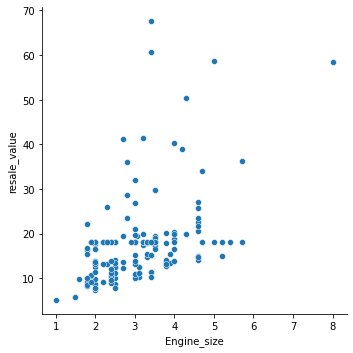

In [38]:
sns.relplot(x="Engine_size",y="resale_value",data=df)

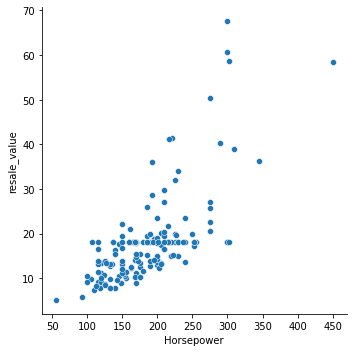

In [39]:
sns.relplot(x="Horsepower",y="resale_value",data=df)

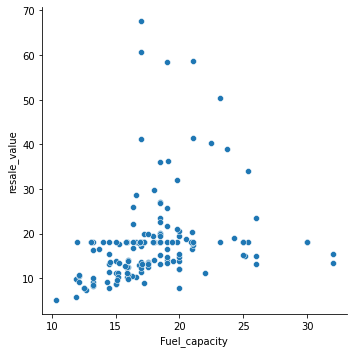

In [40]:
sns.relplot(x="Fuel_capacity",y="resale_value",data=df)

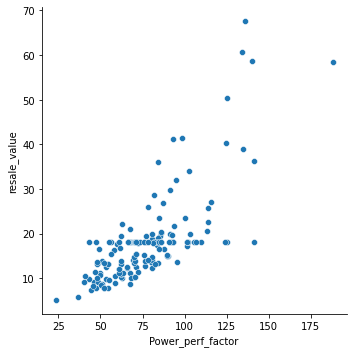

In [41]:
sns.relplot(x="Power_perf_factor",y="resale_value",data=df)

- our goal is to predict the resale value
- here resale_value is target variable

In [42]:
x=df.drop("resale_value",axis=1)
y=df["resale_value"]

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

standardization

In [44]:
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [45]:
def perfect_model(X, y):
    model_algo = {
      
      'Linear_Regression':{
          'model': LinearRegression(),
          'params': {}
        },

        'Decision_Tree':{
            'model': DecisionTreeRegressor(random_state=22),
            'params': {
                'criterion': ['squared_error','friedman_mse','absolute_error'],
                'splitter': ['best', 'random'],
                'max_depth': [x for x in range(5,20,5)],
                'min_samples_leaf': [1, 2, 5]
            }
        },
        "Ridge": {
        "model": Ridge(),
        "params": {
            "alpha":np.arange(0, 1, 0.01)
        }
    },
        'Random_forest':{
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': np.random.randint(20,151,size=5),
                'max_depth': [x for x in range(5,35,5)],
                'min_samples_split': [2, 5, 10,100],
                'min_samples_leaf': [1, 2]
            }
        }
    }
  
    score = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in model_algo.items():
        rs =  RandomizedSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_iter=3)
        rs.fit(x_train,y_train)
        score.append({
          'model': algo_name,
          'best_score': rs.best_score_,
          'best_params': rs.best_params_
      })

    result = pd.DataFrame(score,columns=['model','best_score','best_params'])
    print(result.best_params.tolist())
    return result

In [46]:
perfect_model(x,y)

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 1 is smaller than n_iter=3. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[{}, {'splitter': 'best', 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'squared_error'}, {'alpha': 0.67}, {'n_estimators': 69, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}]


,model,best_score,best_params
0,Linear_Regression,-5.878879e+14,{}
1,Decision_Tree,2.617158e-01,"{'splitter': 'best', 'min_samples_leaf': 1, 'm..."
2,Ridge,4.606112e-01,{'alpha': 0.67}
3,Random_forest,5.156248e-01,"{'n_estimators': 69, 'min_samples_split': 5, '..."


In [47]:
final_lr_model = LinearRegression()
final_lr_model.fit(x_train,y_train)
final_lr_model.score(x_test,y_test)

0.8213445237833416

In [48]:
final_rf_model = RandomForestRegressor(n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_depth=20)
final_rf_model.fit(x_train,y_train)
final_rf_model.score(x_test,y_test)

0.773079303009321

In [49]:
final_dec_model = DecisionTreeRegressor(splitter='best', min_samples_leaf= 2, max_depth=20, criterion='absolute_error')
final_dec_model.fit(x_train,y_train)
final_dec_model.score(x_test,y_test)

0.13514008685162882

In [50]:
final_rid_model = Ridge()
final_rid_model.fit(x_train,y_train)
final_rid_model.score(x_test,y_test)

0.8220100981608043

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_model_error = []
test_model_error = []
models = [final_lr_model,final_rid_model]
model_name = "ridge"
for model in models:
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_mse = mean_squared_error(y_train, y_pred_train)
    train_rmse = np.sqrt(train_mse)

    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_rmse = np.sqrt(test_mse)
    
    train_model_error.append({"Model Name": model, "Mean Absolute Error": train_mae, "Mean Squared Error": train_mse, "Root Mean Squared Error": train_rmse})
    test_model_error.append({"Model Name": model, "Mean Absolute Error": test_mae, "Mean Squared Error": test_mse, "Root Mean Squared Error": test_rmse})
    

train_model_error = pd.DataFrame(train_model_error)
test_model_error = pd.DataFrame(test_model_error)

In [115]:
train_model_error

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,LinearRegression(),3.862488,35.236421,5.936027
1,Ridge(),3.876070,35.246876,5.936908


In [116]:
test_model_error

,Model Name,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,LinearRegression(),3.128656,16.931825,4.114830
1,Ridge(),3.102432,16.868746,4.107158


- I got around 82% accuracy on my test data with linear regression and ridge model
- But the difference between Mean absolute error of train dataset and test dataset of ridge model is 0.7736 whereas LinearRegression 
has 0.7723 difference of mean absolute error of train and test datasets
- for stable performance we need to take the linear regression
-Therfore I am taking linear regression model as a final model

In [52]:
final_lr_model.predict([[23.5,3.5,120,15.2,94]])

C:\Users\sony\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([432.49723078])

In [53]:
import pickle
with open('scaler_resale.pickle','wb') as f:
    pickle.dump(scaler,f)
with open('resale_prediction_model.pickle','wb') as f:
    pickle.dump(final_lr_model,f)